In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split
# scaler & encoding Import 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
### 파이프라인 구축(특성공학 + 학습)
from sklearn.pipeline import make_pipeline
### 결측치처리 , 스케일링과 인코딩 (숫자는 - 중앙값 / 문자 - 최빈값 변경)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# 숫자는 숫자끼리 문자는 문자끼리 처리가 될 수 있도록 파이프를 별도로 구성
# 두파이프를 병합하는 형태
# from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_transformer


### 학습알고리즘 호출
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pickle # python 객체들을 하나의 파일로 변환
from sklearn.model_selection import GridSearchCV
mpl.rc('font', family='Malgun Gothic')
# mpl.rc('font', family='AppleGothic')

In [2]:
!pip install --user imblearn

In [2]:
df1_detect = pd.read_csv('09_Detection.csv')
df2_process = pd.read_csv('09_Process_A.csv')

In [5]:
df1_detect.head(2)

,Unnamed: 0,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A
0,0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882
1,1,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416


In [6]:
df2_process.head(2)

,Unnamed: 0.1,Unnamed: 0,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6
0,0,0,2018-12-01T00:10:00,P1,AVG,225.637279,228.533316,230.788205,230.634245,232.112927,230.630909
1,1,1,2018-12-01T00:20:00,P1,AVG,225.763044,228.519014,230.428961,230.936762,231.899435,230.564272


In [ ]:
pd.to_datetime()

In [9]:
df1_detect['datetime'] = pd.to_datetime(df1_detect['date_clean'])
df2_process['datetime'] = pd.to_datetime(df2_process['DATE'])

In [10]:
pd.merge(df2_process, df1_detect, on='datetime', how='left')

,Unnamed: 0.1,Unnamed: 0_x,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6,datetime,Unnamed: 0_y,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A
0,0,0,2018-12-01T00:10:00,P1,AVG,225.637279,228.533316,230.788205,230.634245,232.112927,230.630909,2018-12-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2018-12-01T00:20:00,P1,AVG,225.763044,228.519014,230.428961,230.936762,231.899435,230.564272,2018-12-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2018-12-01T00:30:00,P1,AVG,225.637431,228.040479,230.276102,230.359142,231.650512,230.317974,2018-12-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,2018-12-01T00:40:00,P1,AVG,224.906854,227.645375,229.837444,229.830891,231.075795,229.694517,2018-12-01 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,2018-12-01T00:50:00,P1,AVG,224.798077,227.710191,229.888123,229.962605,231.004184,229.586533,2018-12-01 00:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10656,10651,10651,2019-09-03T23:20:00,P3,AVG,229.419421,230.737206,231.043314,230.766543,229.620569,227.705867,2019-09-03 23:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10657,10652,10652,2019-09-03T23:30:00,P3,AVG,229.172333,230.566021,230.901487,230.651712,229.510997,227.606733,2019-09-03 23:30:00,472.0,2019-09-03 23:30:00.000,NE282PV,1701,Total [1/m²],15553.431,1237.614,980.762
10658,10653,10653,2019-09-03T23:40:00,P3,AVG,229.333477,230.687242,231.019085,230.721111,229.594107,227.676463,2019-09-03 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10659,10654,10654,2019-09-03T23:50:00,P3,AVG,229.162736,230.555417,231.024972,230.583142,229.613431,227.703735,2019-09-03 23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pd.merge(df2_process, df1_detect, on='datetime', how='right')

,Unnamed: 0.1,Unnamed: 0_x,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6,datetime,Unnamed: 0_y,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A
0,20.0,20.0,2018-12-01T03:30:00,P1,AVG,224.638902,227.413493,229.905499,229.657359,230.931185,229.420348,2018-12-01 03:30:00.000,0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01 07:30:00.005,1,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01 11:30:00.010,2,2018-12-01 11:30:00.010,NE280V,GO1701,Total [1/m²],4453.201,74.017,23.511
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01 15:30:00.015,3,2018-12-01 15:30:00.015,NE280PV,GO1701,Total [1/m²],4352.190,77.500,37.444
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01 19:30:00.020,4,2018-12-01 19:30:00.020,NE280V,GO1701,Total [1/m²],4345.224,62.697,40.927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,10604.0,10604.0,2019-09-03T15:30:00,P3,AVG,228.894231,230.397130,231.012732,230.710081,229.776926,227.902789,2019-09-03 15:30:00.000,469,2019-09-03 15:30:00.000,NE282PV,1701,Total [1/m²],27633.534,3436.123,2903.202
470,10622.0,10622.0,2019-09-03T18:30:00,P3,AVG,229.004528,230.446154,230.866429,230.840892,229.665830,227.779707,2019-09-03 18:30:00.000,470,2019-09-03 18:30:00.000,NE282PV,1701,Total [1/m²],14115.267,951.667,728.541
471,10628.0,10628.0,2019-09-03T19:30:00,P3,AVG,229.249716,230.743679,231.029600,230.840803,229.704163,227.779644,2019-09-03 19:30:00.000,471,2019-09-03 19:30:00.000,NE282PV,1701,Total [1/m²],13207.919,788.144,605.793
472,10652.0,10652.0,2019-09-03T23:30:00,P3,AVG,229.172333,230.566021,230.901487,230.651712,229.510997,227.606733,2019-09-03 23:30:00.000,472,2019-09-03 23:30:00.000,NE282PV,1701,Total [1/m²],15553.431,1237.614,980.762


In [13]:
# 시간단위 반올림
df1_detect['dt_round'] = df1_detect['datetime'].round('T') # 'T' ->분단위 반올림

pd.merge(df2_process, df1_detect, left_on='datetime', right_on='dt_round', how='right')

,Unnamed: 0.1,Unnamed: 0_x,DATE,PERIOD,Label,A1,A2,A3,A4,A5,...,Unnamed: 0_y,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A,datetime_y,dt_round
0,20.0,20.0,2018-12-01T03:30:00,P1,AVG,224.638902,227.413493,229.905499,229.657359,230.931185,...,0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882,2018-12-01 03:30:00.000,2018-12-01 03:30:00
1,44.0,44.0,2018-12-01T07:30:00,P1,AVG,225.430882,228.297069,230.934893,231.026156,231.795967,...,1,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416,2018-12-01 07:30:00.005,2018-12-01 07:30:00
2,68.0,68.0,2018-12-01T11:30:00,P1,AVG,229.063690,230.710820,232.028457,231.395510,231.208500,...,2,2018-12-01 11:30:00.010,NE280V,GO1701,Total [1/m²],4453.201,74.017,23.511,2018-12-01 11:30:00.010,2018-12-01 11:30:00
3,92.0,92.0,2018-12-01T15:30:00,P1,AVG,228.312661,229.785002,230.958881,230.267388,230.243133,...,3,2018-12-01 15:30:00.015,NE280PV,GO1701,Total [1/m²],4352.190,77.500,37.444,2018-12-01 15:30:00.015,2018-12-01 15:30:00
4,116.0,116.0,2018-12-01T19:30:00,P1,AVG,229.209428,230.345179,230.993988,230.115520,229.526814,...,4,2018-12-01 19:30:00.020,NE280V,GO1701,Total [1/m²],4345.224,62.697,40.927,2018-12-01 19:30:00.020,2018-12-01 19:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,10604.0,10604.0,2019-09-03T15:30:00,P3,AVG,228.894231,230.397130,231.012732,230.710081,229.776926,...,469,2019-09-03 15:30:00.000,NE282PV,1701,Total [1/m²],27633.534,3436.123,2903.202,2019-09-03 15:30:00.000,2019-09-03 15:30:00
470,10622.0,10622.0,2019-09-03T18:30:00,P3,AVG,229.004528,230.446154,230.866429,230.840892,229.665830,...,470,2019-09-03 18:30:00.000,NE282PV,1701,Total [1/m²],14115.267,951.667,728.541,2019-09-03 18:30:00.000,2019-09-03 18:30:00
471,10628.0,10628.0,2019-09-03T19:30:00,P3,AVG,229.249716,230.743679,231.029600,230.840803,229.704163,...,471,2019-09-03 19:30:00.000,NE282PV,1701,Total [1/m²],13207.919,788.144,605.793,2019-09-03 19:30:00.000,2019-09-03 19:30:00
472,10652.0,10652.0,2019-09-03T23:30:00,P3,AVG,229.172333,230.566021,230.901487,230.651712,229.510997,...,472,2019-09-03 23:30:00.000,NE282PV,1701,Total [1/m²],15553.431,1237.614,980.762,2019-09-03 23:30:00.000,2019-09-03 23:30:00


In [17]:
# 공정 데이터를 30분 단위로 묶어서 통계량을 계산한 다음,
# 30분단위로 계산된 공정 값의 평균과 품질검사 데이터를병함

df2_process_30T = df2_process.set_index('datetime').resample('30T').mean()
df2_process_30T
# set_index : 특정값 : (순서 / 날짜)을 index로 지정
# resample : 특정 단위 별로 value값을 계산하는 함수 


,Unnamed: 0.1,Unnamed: 0,A1,A2,A3,A4,A5,A6
datetime,,,,,,,,
2018-12-01 00:00:00,0.5,0.5,225.700162,228.526165,230.608583,230.785503,232.006181,230.597590
2018-12-01 00:30:00,3.0,3.0,225.114121,227.798682,230.000556,230.050880,231.243497,229.866341
2018-12-01 01:00:00,6.0,6.0,224.606590,227.154708,229.389907,229.305427,230.581515,229.237705
2018-12-01 01:30:00,9.0,9.0,223.712497,226.366240,228.735592,228.744490,229.931431,228.647972
2018-12-01 02:00:00,12.0,12.0,223.746797,226.484087,228.722355,228.844524,229.979558,228.669284
...,...,...,...,...,...,...,...,...
2019-09-03 22:00:00,10644.0,10644.0,229.367287,230.669100,231.027413,230.727056,229.580945,227.653453
2019-09-03 22:30:00,10647.0,10647.0,229.303163,230.635927,230.978463,230.712922,229.539516,227.605164
2019-09-03 23:00:00,10650.0,10650.0,229.319672,230.656084,231.027084,230.704942,229.612670,227.681811


- Pandas 시간단위

-  s : 초 / T :분단위 / H : 시간단위 / D:일 / B : 평일기준 / 
-  W: 주단위/ W-MON : 주단위(월)
-  M: 월단위(마지막일) / MS: 각달의 첫날
-  Q -JAN : 각 분기의 첫달의 마지막 날 / Q-DEC : 각 분기의 마지막달의 마지막날

In [18]:
df2_process_T = df2_process_30T.reset_index()

In [21]:
df1_merge = pd.merge(df2_process, df1_detect, left_on='datetime', right_on='dt_round', how='right')

In [30]:
# 관리도
#중신선 : 데이터의 대표값
#관리 상한선 (Upper Spec Limit) : (Xbar- sd) ) + 3x(표준편차)
# 관리 하한선 (Lower Spec Limit) : (Xbar- sd) ) - 3x(표준편차)



center =df1_merge['A1'].mean()
USL = center + (df1_merge['A1'].std() *3)
LSL = center - (df1_merge['A1'].std() *3)

In [34]:
df1_A1_Xbar = df1_merge[['A1']].reset_index()
df1_A1_Xbar['Center'] = center
df1_A1_Xbar['USL'] = USL
df1_A1_Xbar['LSL'] = LSL
df1_A1_Xbar

,index,A1,Center,USL,LSL
0,0,224.638902,228.978868,286.024139,171.933597
1,1,225.430882,228.978868,286.024139,171.933597
2,2,229.063690,228.978868,286.024139,171.933597
3,3,228.312661,228.978868,286.024139,171.933597
4,4,229.209428,228.978868,286.024139,171.933597
...,...,...,...,...,...
469,469,228.894231,228.978868,286.024139,171.933597
470,470,229.004528,228.978868,286.024139,171.933597
471,471,229.249716,228.978868,286.024139,171.933597
472,472,229.172333,228.978868,286.024139,171.933597


In [35]:
import seaborn as sns

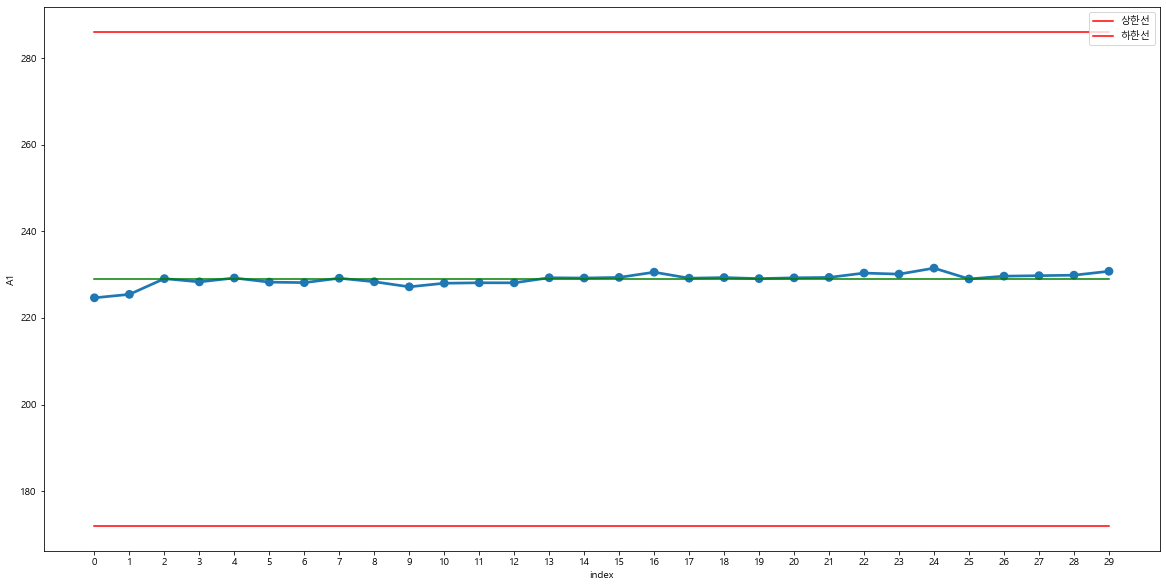

In [47]:
plt.figure(figsize=(20, 10))
sns.pointplot(data = df1_A1_Xbar[:30], x= 'index', y='A1')
sns.lineplot(data = df1_A1_Xbar[:30], x= 'index', y='Center', color='green')
sns.lineplot(data=df1_A1_Xbar[:30],x= 'index', y='USL', color='red', label='상한선')
sns.lineplot(data=df1_A1_Xbar[:30],x= 'index', y='LSL', color='red', label='하한선')
plt.legend()
plt.show()

In [57]:
# Plotly 관리도 시각화

fig1 = px.line(df1_A1_Xbar.iloc[:30], x='index', y='A1')
fig1.update_traces(mode='markers+lines')
fig1.add_hline(y=center, line_color='Blue')
fig1.add_hline(y=USL, line_color='Red')
fig1.add_hline(y=LSL, line_color='Red')
fig1.update_layout(yaxis_range = [LSL-10, USL+10])

In [58]:
#학습데이터와 검증데이터 분할
from sklearn.model_selection import train_test_split

#특성공학과 학습이 수행될 파이프라인 굿ㅇ
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#특성공학
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#학습 알고리즘
from sklearn.tree import DecisionTreeRegressor

#교차검증
from sklearn.model_selection import GridSearchCV

#평가
from sklearn.metrics import r2_score


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
numeric_pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include = 'object').columns.tolist() # 문자데이터만 뽑기

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                            (category_pipe, category_list))

model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeRegressor())
model_pipe

# Imbalanced Data Sampling

- 분류 (classification)
- 데이터 비율이 크게 차이가발생한 경우 한쪽에 맞춰 데이터를 늘리거나 줄이는 작업

    - Under Sampling : 데이터의 비율이 적은 값에 맞춰 데이터를 줄려주는 작업
    
        - Random Ubder Sampling : 비율이 많은 쪽의 데이터를 무작위 추출하여 줄임
        - Tomk's Link : 서로 다른 값의 인접한 항목을 묶어 많은쪽의 데이터를 삭제
            - 데이터의 비율이 한쪽이 적더라도 분류 경계 명확해짐. 분류모델 성능 ↑
            - 범주형 항목이 다수 있거나, 분류경계가 매우 모호한 경우
        - CNN(Condensed Nearest Neighbor) = KNN : 비율이 많은 쪽에 데이터에서 밀도가 높은
                                                    부분의 데이터를 삭제
        - One Sided Selection (Tomk's Link + CNN ) : 
        
    - Over Sampling : 데이터의 비율이 높은 값에 맞춰 데이터를 생성하는작업
        
        - Random Over Sampling : 비율이 적은 데이터를 무작위 생성하여, 많은쪽으로 맞춤.
        - SMOTE(Synethic Minority Over Sampling Technique) : KNN 알고리즘을 이용하여 , 비율이 적은쪽의 데이터를 K개의 인접개수 만큼 묶은 뒤 , 묶인 데이터 내 중심점을 찾아 데이터를 생성
        - adasyn (Adaptive Synethic Sampling ): SMOTE 기법을 이용해 데이터를 생성하는 단계에서 임의의 값(Noise, 감마밀도함수)를 더하여서 더 사실적인 데이터를 생성하는 기법
        
        
   
- 공정 : 불량여부 Y-> 정상 950 / 불량 50
    - under sampling : 정상 / 불량 50

In [60]:
from imblearn.under_sampling import RandomUnderSampler

In [62]:
df1 = pd.read_csv('./01_Data.csv')

In [67]:
df1['State'].unique

<bound method Series.unique of 0        계약확정
1        계약확정
2        계약확정
3        계약확정
4        기간만료
         ... 
51296    계약확정
51297    계약확정
51298    계약확정
51299    계약확정
51300    계약확정
Name: State, Length: 51301, dtype: object>

# Mission 1~4 new

# Mission (1~4 New / ~9)

- df1_merge 이용하여 아래의 문제를 해결하고자 한다.

1. 'tag' 항목의 각 값들의 빈도수를 계산
2. 'Y1A'에서 3000이상인 값을 추출하여, 높은 순서대로 정렬한 뒤, 
    tag별 A1 값의 평균을 계산
3. 'dt_round' 값을 이용해, 연도/월/일 자를 추출하여 새로운 변수로 선언
4. '일'별 'Y1A'의 합을 Table형태로 계산
5. 'tag'항목에서 NE282PV 항목을 추출하여, **일별***로 A1~A6 평균을 계산
    (Pivot_table X / resample 사용)
6. 위에서 계산된 테이블을 df_clean_day 선언을 한 뒤, 결측값을 제거하고, A1값에 대한
    Xbar - sd 관리도를 시각화 (index 주의)
7. df1_merge에서 결측값을 제거한 뒤, tag의 'NE280PV'값과 'NE282PV'값에 대해 A1값이 평균의
    차이가 있는지 가설 검정을 수행하고, 평균을 비교하는 그래프를 시각화 하시오.
8. 'Y1A'값과 'A1'값의 산점도를 tag에 따라 색상을 나누어 시각화하고, 두 값이 상관성이
    있는지 가설검정을 수행
9. 'Y1A'값이 상위 90%이상인 값을 1, 미만인 값을 0로 변환하여 'Target'값으로 선언한 뒤,
    A1 ~ A6 값을 넣었을 때, Target을 분류하는  분류모델 생성
     - 8:2비율로 학습데이터와 검증 데이터 분할
     - Min Max Scaling 기법과 Imputation(평균대치), Imbalanced(SMOTE), 교차검증 5회
     - 가장 성능이 좋은 모델을 찾아, model_target.sav이름으로 저장
     - 평가 : 학습능력평가 / 일반화능력평가

In [69]:
# 1
df1_merge['tag'].value_countsounts()

NE280PV    373
NE282PV     75
NE280V      13
E280PV      13
Name: tag, dtype: int64

In [75]:
# 2 
cond1 = (df1_merge['Y1A'] >= 3000)

df1_merge.loc[cond1].sort_values(by='Y1A', ascending=False).pivot_table(index='Y1A', values='tag', aggfunc='mean').reset_index()

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_5404\1627047900.py:4: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



,Y1A
0,3033.379
1,3073.310
2,3099.084
3,3100.034
4,3157.471
...,...
427,19864.424
428,22569.040
429,22668.526
430,23376.695


In [78]:
# 3
df1_merge['year'] = df1_merge['dt_round'].dt.year
df1_merge['month'] = df1_merge['dt_round'].dt.month
df1_merge['day'] = df1_merge['dt_round'].dt.day

In [209]:
# 4

df1_merge.pivot_table(index='Y1A', values='day', aggfunc='sum').reset_index()

,Y1A,day
0,593.805,12
1,935.872,2
2,1082.057,7
3,1471.121,8
4,1541.965,9
...,...,...
469,19864.424,14
470,22569.040,3
471,22668.526,3
472,23376.695,5


In [206]:
# 5. 'tag'항목에서 NE282PV 항목을 추출하여, **일별***로 A1~A6 평균을 계산
#     (Pivot_table X / resample 사용)

# # df1_merge['tag'].value_counts()
# # cond1 = (df1_merge['day'].value_counts().values)
# from imblearn.under_sampling import TomekLinks
# df1_merge_A1_6 = df1_merge[['A1', 'A2', 'A3', 'A4', 'A5', 'A6']]


cond1 = (df1_merge['tag'] == 'NE282PV') 
df1_merge.loc[cond1].set_index('dt_round').resample('D').mean()

,Unnamed: 0.1,Unnamed: 0_x,A1,A2,A3,A4,A5,A6,Unnamed: 0_y,Y1A,Y2A,Y3A,year,month,day
dt_round,,,,,,,,,,,,,,,
2018-12-31,3140.0,3140.0,229.640614,230.526541,231.745779,230.559467,230.024288,228.097342,130.0,13168.03100,500.702000,272.5560,2018.0,12.0,31.0
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,10160.0,10160.0,232.808470,234.007563,234.086042,233.710477,232.403670,230.382108,446.5,5830.62050,862.947667,679.1850,2019.0,8.0,31.0
2019-09-01,10244.0,10244.0,231.160515,232.527569,232.936724,232.567294,231.536508,229.565942,450.0,3761.68300,385.733000,374.4060,2019.0,9.0,1.0
2019-09-02,10388.0,10388.0,228.750878,230.333110,231.107782,230.821238,230.110581,228.090076,456.0,4395.01800,506.175000,452.3930,2019.0,9.0,2.0


In [186]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler()
under_sampler.fit(df1_merge_A1_6, df1_merge['Target'])

RandomUnderSampler()

In [210]:
df1_A1_Xbar

,index,A1
0,0,224.638902
1,1,225.430882
2,2,229.063690
3,3,228.312661
4,4,229.209428
...,...,...
443,468,229.108532
444,469,228.894231
445,470,229.004528
446,471,229.249716


In [94]:
# 6. 위에서 계산된 테이블을 df_clean_day 선언을 한 뒤, 결측값을 제거하고, A1값에 대한
#     Xbar - sd 관리도를 시각화 (index 주의)

df_clean_day = df1_merge.dropna()
df_clean_day.head(2)

center =df_clean_day['A1'].mean()
USL = center + (df_clean_day['A1'].std() *3)
LSL = center - (df_clean_day['A1'].std() *3)

df1_A1_Xbar = df_clean_day[['A1']].reset_index()

fig1 = px.line(df1_A1_Xbar.iloc[:30], x='index', y='A1')
fig1.update_traces(mode='markers+lines')
fig1.add_hline(y=center, line_color='Blue')
fig1.add_hline(y=USL, line_color='Red')
fig1.add_hline(y=LSL, line_color='Red')
fig1.update_layout(yaxis_range = [LSL-10, USL+10])

In [213]:
df1_cc=df_clean_day[['A1']].reset_index().reset_index()

# sns.pointplot(data=df1_cc[:30])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='tag', ylabel='count'>

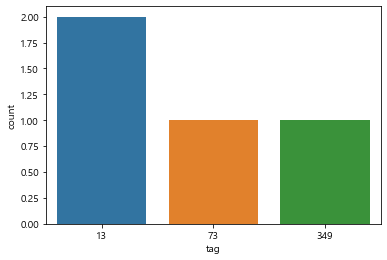

In [139]:
# 7. df1_merge에서 결측값을 제거한 뒤, tag의 'NE280PV'값과 'NE282PV'값에 대해 A1값이 평균의
#     차이가 있는지 가설 검정을 수행하고, 평균을 비교하는 그래프를 시각화 하시오.


df1_clean = df1_merge.dropna()
df1_clean['tag'].value_counts()

cond1 = (df1_clean['tag'] == 'NE280PV')
cond2 = (df1_clean['tag'] == 'NE282PV')

# stats.normaltest(df1_clean.loc[cond1]['tag'])
stats.ranksums(df1_clean.loc[cond1]['A1'], df1_clean.loc[cond2]['A1']) #  pvalue=3.429382620636209e-41)

sns.countplot(df1_clean['tag'].value_counts())

In [ ]:
cond1 = (df1_clean['tag'] == 'NE280PV')
cond2 = (df1_clean['tag'] == 'NE282PV')

In [143]:
df1_clean['tag']

0       NE280V
1      NE280PV
2       NE280V
3      NE280PV
4       NE280V
        ...   
468     E280PV
469    NE282PV
470    NE282PV
471    NE282PV
472    NE282PV
Name: tag, Length: 448, dtype: object

In [189]:
# 8. 'Y1A'값과 'A1'값의 산점도를 tag에 따라 색상을 나누어 시각화하고, 두 값이 상관성이
#     있는지 가설검정을 수행


# sns.scatterplot(data=df1_clean, x='Y1A', y='A1', hue='tag')


stats.normaltest(df1_clean['Y1A']) #  pvalue=2.0623738973377755e-07)
stats.normaltest(df1_clean['A1']) # pvalue=2.361415511516925e-178) 
# stats.ranksums(df1_clean['Y1A'], df1_clean['A1']) # pvalue=5.340550067587804e-148)

NormaltestResult(statistic=818.0017706413818, pvalue=2.361415511516925e-178)

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
df1_merge

,Unnamed: 0.1,Unnamed: 0_x,DATE,PERIOD,Label,A1,A2,A3,A4,A5,...,unit,Y1A,Y2A,Y3A,datetime_y,dt_round,year,month,day,Target
0,20.0,20.0,2018-12-01T03:30:00,P1,AVG,224.638902,227.413493,229.905499,229.657359,230.931185,...,Total [1/m²],4954.774,327.416,256.882,2018-12-01 03:30:00.000,2018-12-01 03:30:00,2018,12,1,1
1,44.0,44.0,2018-12-01T07:30:00,P1,AVG,225.430882,228.297069,230.934893,231.026156,231.795967,...,Total [1/m²],2281.460,44.410,17.416,2018-12-01 07:30:00.005,2018-12-01 07:30:00,2018,12,1,0
2,68.0,68.0,2018-12-01T11:30:00,P1,AVG,229.063690,230.710820,232.028457,231.395510,231.208500,...,Total [1/m²],4453.201,74.017,23.511,2018-12-01 11:30:00.010,2018-12-01 11:30:00,2018,12,1,1
3,92.0,92.0,2018-12-01T15:30:00,P1,AVG,228.312661,229.785002,230.958881,230.267388,230.243133,...,Total [1/m²],4352.190,77.500,37.444,2018-12-01 15:30:00.015,2018-12-01 15:30:00,2018,12,1,1
4,116.0,116.0,2018-12-01T19:30:00,P1,AVG,229.209428,230.345179,230.993988,230.115520,229.526814,...,Total [1/m²],4345.224,62.697,40.927,2018-12-01 19:30:00.020,2018-12-01 19:30:00,2018,12,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,10604.0,10604.0,2019-09-03T15:30:00,P3,AVG,228.894231,230.397130,231.012732,230.710081,229.776926,...,Total [1/m²],27633.534,3436.123,2903.202,2019-09-03 15:30:00.000,2019-09-03 15:30:00,2019,9,3,1
470,10622.0,10622.0,2019-09-03T18:30:00,P3,AVG,229.004528,230.446154,230.866429,230.840892,229.665830,...,Total [1/m²],14115.267,951.667,728.541,2019-09-03 18:30:00.000,2019-09-03 18:30:00,2019,9,3,1
471,10628.0,10628.0,2019-09-03T19:30:00,P3,AVG,229.249716,230.743679,231.029600,230.840803,229.704163,...,Total [1/m²],13207.919,788.144,605.793,2019-09-03 19:30:00.000,2019-09-03 19:30:00,2019,9,3,1
472,10652.0,10652.0,2019-09-03T23:30:00,P3,AVG,229.172333,230.566021,230.901487,230.651712,229.510997,...,Total [1/m²],15553.431,1237.614,980.762,2019-09-03 23:30:00.000,2019-09-03 23:30:00,2019,9,3,1


In [166]:
from imblearn.over_sampling import SMOTE

In [167]:
#11. 'Y1A'값이 상위 90%이상인 값을 1, 미만인 값을 0로 변환하여 'Target'값으로 선언한 뒤,
#     A1 ~ A6 값을 넣었을 때, Target을 분류하는  분류모델 생성
#      - 8:2비율로 학습데이터와 검증 데이터 분할
#      - Min Max Scaling 기법과 Imputation(평균대치), Imbalanced(SMOTE), 교차검증 5회
#      - 가장 성능이 좋은 모델을 찾아, model_target.sav이름으로 저장
#      - 평가 : 학습능력평가 / 일반화능력평가

def func(data):
    if data >= df1_merge['Y1A'].quantile(0.1):
        return '1'
    else:
        return '0'
    
    
df1_merge['Target'] = df1_merge['Y1A'].apply(func)
# df1_merge
X_ = df1_merge[['A1', 'A2', 'A3', 'A4', 'A5', 'A6']]
Y_ = df1_merge['Target']

X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.3, random_state=1)

numeric_pipe = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

numeric_list = X_.describe().columns.tolist()
# category_list = X_.describe(include = 'object').columns.tolist() # 문자데이터만 뽑기

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                            )

model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeRegressor())
model_pipe

make_pipeline(preprocessing_pipe, SMOTE(), DecisionTreeClassifier())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['A1', 'A2', 'A3', 'A4', 'A5',
                                                   'A6'])])),
                ('smote', SMOTE()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [214]:
stats.normaltest(df_clean_day['A1'])

NormaltestResult(statistic=818.0017706413818, pvalue=2.361415511516925e-178)

In [217]:
# 10. 'A1'값을 Robust Scaling 실시하고, 스케일링 된 값이 0보다 작은 데이터를 추출하여 'A1'값의 평균을 계산하시오.

# from sklearn.preprocessing import StandardScaler
# standardScaler = StandardScaler()
# print(standardScaler.fit(X))
# train_data_standardScaled = standardScaler.transform(X)


from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(X))
train_data_robustScaled = robustScaler.transform(X)
cond1 = (X['A1'] < 0)
X.loc[cond1].mean()

RobustScaler()


A1   NaN
A2   NaN
A3   NaN
A4   NaN
A5   NaN
A6   NaN
dtype: float64

In [207]:
#11. 
def func(data):
    if data >= df1_merge['Y1A'].quantile(0.1):
        return '1'
    else:
        return '0'
    
    
df1_merge['Target'] = df1_merge['Y1A'].apply(func)
# df1_merge
X_ = df1_merge[['A1', 'A2', 'A3', 'A4', 'A5', 'A6']]
Y_ = df1_merge['Target']

X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.3, random_state=1)

numeric_pipe = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

numeric_list = X_.describe().columns.tolist()
# category_list = X_.describe(include = 'object').columns.tolist() # 문자데이터만 뽑기

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                            )

model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeRegressor())
model_pipe

make_pipeline(preprocessing_pipe, SMOTE(), DecisionTreeClassifier())

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['A1', 'A2', 'A3', 'A4', 'A5',
                                                   'A6'])])),
                ('smote', SMOTE()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])